
# <font color='red'>Bel Cupcakes</font>  
### Otimizando as receitas de Cupcakes
***

## Preparando Ambiente

### Importando Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pyDOE2 as doe
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

  

#### Configurnado Graficos Seaborn

In [2]:
sns.set_palette('terrain')
sns.set_style('darkgrid')

### Criando o planejamento fatorial 2²

In [3]:
ensaios = doe.ff2n(2)

### Criando DataFrame

In [4]:
experimento =  pd.DataFrame(ensaios,index=['Exp. 1', 'Exp. 2', 'Exp. 3', 'Exp. 4'],columns=['Farinha','Chocolate'])
experimento['Porcoes'] = [19, 37, 24, 49]
experimento

,Farinha,Chocolate,Porcoes
Exp. 1,-1.0,-1.0,19
Exp. 2,1.0,-1.0,37
Exp. 3,-1.0,1.0,24
Exp. 4,1.0,1.0,49


## Analisando DataFrame
___

### Farinha

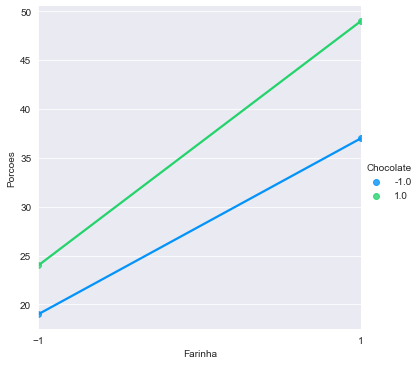

In [5]:
ax1 = sns.lmplot(data= experimento, x = 'Farinha', y = 'Porcoes', ci = None, hue= 'Chocolate')
ax1.set(xticks = (-1,1))

### Chocolate

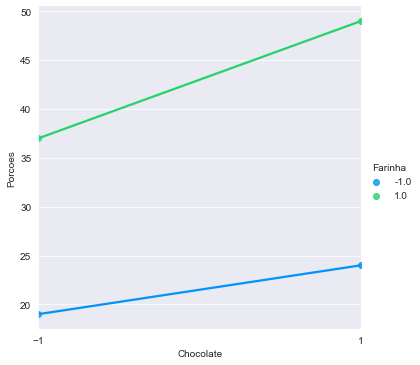

In [6]:
ax2 = sns.lmplot(data= experimento, x = 'Chocolate', y = 'Porcoes', ci = None, hue= 'Farinha')
ax2.set(xticks = (-1,1))

### Comparando Graficos

Ao colocar lado a lado os graficos, podemos observar que a farinha exerce maior influencia na quantidade de Cupcakes que o chocolate.(necessario analise estatistica para confirmar)
Com isso é possivel pensar em duas hipóteses. A primeira, que há provavelmente um efeito de interação entre a farinha e o chocolate e segundo, que a farinha, ela possui maior influência na quantidade de cupcakes produzidos.

### Analisando Estatisticamente

#### Modelo Estatístico

In [7]:
import statsmodels.formula.api as smf

In [8]:
modelo = smf.ols(data= experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [9]:
modelo_ajustado = modelo.fit()

In [10]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 10 May 2021   Prob (F-statistic):                nan
Time:                        17:35:14   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

Entre os parâmetros que contabilizam os efeitos das variáveis manipuláveis na resposta do modelo, o β1 apresenta o maior valor. Logo, o efeito isolado da farinha é o que mais influencia a quantidade de cupcakes produzidos.

#### Aumentando o Numero de Ensaios

In [11]:
centro = np.array([[0,0,29],
                   [0,0,30],
                   [0,0,29],
                   [0,0,30]])

centro_dataframe = pd.DataFrame(centro, columns= ['Farinha','Chocolate','Porcoes'], index = ['Exp. 5', 'Exp. 6', 'Exp. 7', 'Exp. 8'])

In [12]:
experimento = experimento.append(centro_dataframe)

In [13]:
experimento

,Farinha,Chocolate,Porcoes
Exp. 1,-1.0,-1.0,19
Exp. 2,1.0,-1.0,37
Exp. 3,-1.0,1.0,24
Exp. 4,1.0,1.0,49
Exp. 5,0.0,0.0,29
Exp. 6,0.0,0.0,30
Exp. 7,0.0,0.0,29
Exp. 8,0.0,0.0,30


In [14]:
modelo = smf.ols(data= experimento, formula = 'Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')
modelo_ajustado = modelo.fit()
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 10 May 2021   Prob (F-statistic):            0.00152
Time:                        17:35:15   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

Assumindo um intervalo de confiança de 5% e obcervando o P>|t| de cada ponto, asumimos a Hipotese Nula para o efeito de inteiração entre a farinha e o chocolate, por apresentar um valor superior aos 5%, de 15.6%. Para os demais pontos, como apresentam valor inferior ao intervalo de confiaça, assumimos a Hipotese Alternativa, assim sendo estatisticamente significativos.

### Grafico de Pareto

In [15]:
t_valores = modelo_ajustado.tvalues
nome = t_valores.index.tolist()

from scipy import stats
districuicao = stats.t(df=4)
limite = [districuicao.ppf(q = 1- 0.025)]*len(nome)

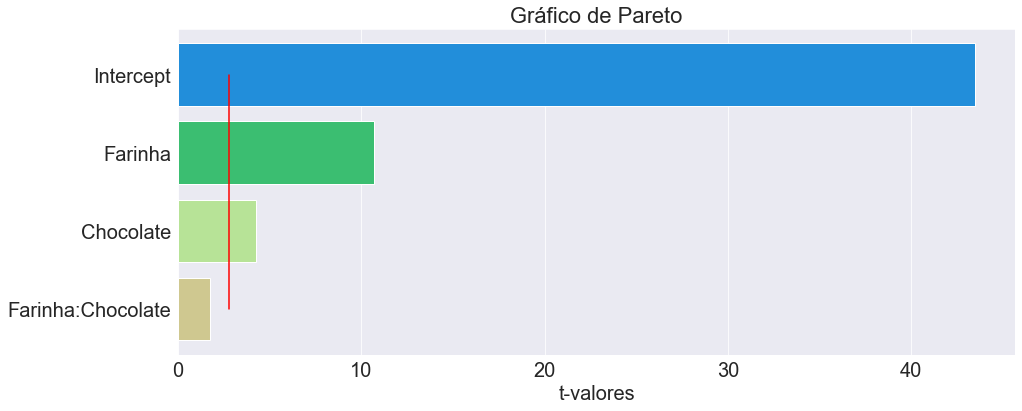

In [16]:
pareto = sns.barplot(x  = t_valores,y= nome)

pareto.figure.set_size_inches(15,6)
pareto.tick_params(labelsize = 20)
pareto.set_xlabel('t-valores',fontsize = 20)
pareto.set_title('Gráfico de Pareto', fontsize = 22)

pareto.plot(limite, nome, 'r')

## Propondo novo modelo
___

Como pudemos observar que no teste estatisitco, não existe efeito estatisticamente significativo entre a relação da farinha e o chocolate. Com isso propomos um modelo atualizado que leva em consideração apenas os pontos significativamente relevantes.

In [17]:
modelo_2 = smf.ols(data= experimento, formula = 'Porcoes ~ Farinha + Chocolate')
modelo_ajustado_2 = modelo_2.fit()
print(modelo_ajustado_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 10 May 2021   Prob (F-statistic):           0.000571
Time:                        17:35:15   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

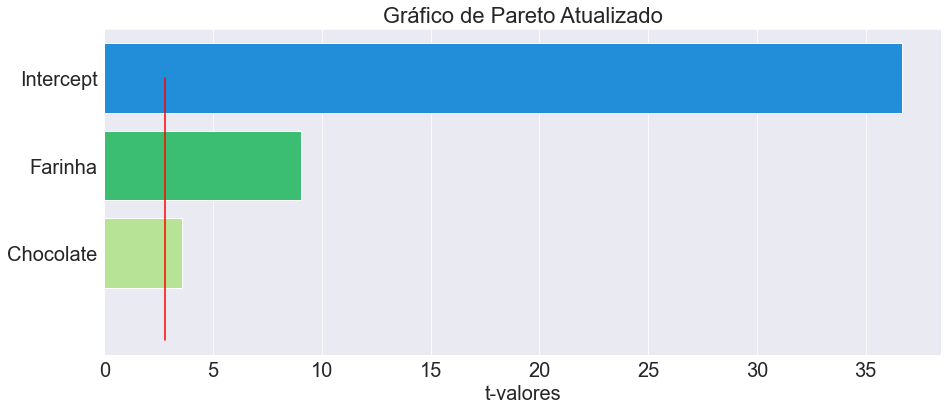

In [18]:
t_valores_2 = modelo_ajustado_2.tvalues
nome_2 = t_valores_2.index.tolist()

distribuicao_2 = stats.t(df=4)
limite_2 = [districuicao.ppf(q = 1- 0.025)]*len(nome_2)

pareto_2 = sns.barplot(x  = t_valores_2, y= nome_2)

pareto_2.figure.set_size_inches(15,6)
pareto_2.tick_params(labelsize = 20)
pareto_2.set_xlabel('t-valores',fontsize = 20)
pareto_2.set_title('Gráfico de Pareto Atualizado', fontsize = 22)

pareto_2.plot(limite, nome, 'r')

### Verificando Modelo (R²)

<https://blog.minitab.com/pt/analise-de-regressao-como-interpretar-o-r-quadrado-e-avaliar-a-qualidade-de-ajuste>   
Como nosso modelo apresenta um R² proximo ao zero podemos assumir que ele consegue explicar a variabilidade nos dados, ou seja, ele é um modelo representativo.

# Explorando Modelo 
***

In [33]:
parametros = modelo_ajustado_2.params
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

## Criando função de Experimentação

In [34]:
def modelo_receita(x_f, x_c):
    
    #limite
    
    limite_normalizado = [-1,+1]
    
    limite_farinha = [0.5,1.5]
    
    limite_chocolate = [0.1,0.5]
    
    
    #Converter 
    
    x_f_convertido = np.interp(x_f, limite_farinha, limite_normalizado     )
    
    x_c_convertido = np.interp(x_c, limite_chocolate, limite_normalizado                 )
    
    
    
    
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_convertido  + parametros['Chocolate']*x_c_convertido
    
    
    return round(porcoes)


In [35]:
modelo_receita(0.6,1.1)

27

### Gerando Representação Grafíca

In [36]:
x_farinha = np.linspace(start = 0.5, stop = 1.5, num = 10     )

x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [37]:
x_chocolate = np.linspace(start = 0.1, stop = 0.5, num = 10  )


x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [38]:
pontos = []


for cont1 in x_farinha:
    
    temp = []
    
    for cont2 in x_chocolate:
        
        temp.append(modelo_receita(cont1, cont2   ))
        
    pontos.append(temp)       

In [39]:
pontos = [[16, 17, 18, 19, 20, 21, 22, 22, 23, 24],
 [18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
 [21, 22, 23, 23, 24, 25, 26, 27, 28, 29],
 [23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
 [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 [28, 29, 30, 31, 32, 33, 33, 34, 35, 36],
 [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
 [33, 34, 34, 35, 36, 37, 38, 39, 40, 41],
 [35, 36, 37, 38, 39, 40, 41, 42, 43, 43],
 [37, 38, 39, 40, 41, 42, 43, 44, 45, 46]]

In [26]:
import matplotlib.cm as cm

<a list of 7 text.Text objects>

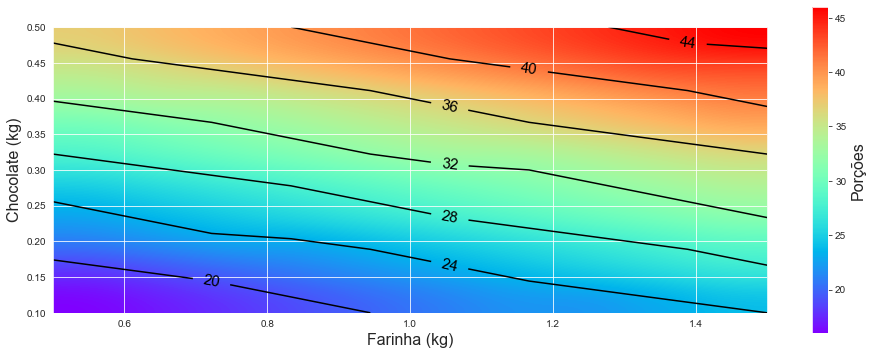

In [40]:
#base

plt.figure(figsize=(16,6))
plt.xlabel('Farinha (kg)', fontsize = 16)
plt.ylabel('Chocolate (kg)', fontsize = 16)

#mapa de cores

mapa_cor = plt.imshow(pontos, origin = 'lower' , cmap = cm.rainbow, interpolation= 'quadric', extent= (0.5,1.5, 0.1,0.5))

#barra de cor

plt.colorbar().set_label("Porções", fontsize = 16)

#linhas

linhas = plt.contour(x_farinha, x_chocolate, pontos, colors= 'k', linewidths= 1.5)

plt.clabel(linhas, inline = True, fmt = '%1.0f', fontsize = 15.0, inline_spacing = 10)

# Conclusão

Não encontramos evidencias estatisticas que colaboracem com a hipotese de uma relação entre as proporções de Farinha e Chocolate. Assim apos ajustarmos o modelo conseguimos chegar em um grafico que 